# ABOUT 

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

**Importing all the essential libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from keras.utils import np_utils

Using TensorFlow backend.


**Importing the dataset**

In [0]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

**Checking how an image looks like**

In [0]:
import cv2
from google.colab.patches import cv2_imshow

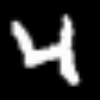

In [4]:
cv2_imshow(cv2.resize(X_train[20],(100,100)))

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

As we can see,it is a multiclass classification problem

In [0]:
#reshaping the values
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]) #(60000,28*28)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]) #(10000,28*28)

#one hot encoding the target variables
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

In [9]:
X_train.shape

(60000, 784)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Building neural network**

In [0]:
#Initializing the model
model = Sequential()

#adding first layer 
#Dense is the layer used for ANN ,32 outputs from this layer ,input_dim = no.of predictors,and activation function to be used is relu
model.add(Dense(32,input_shape=(X_train.shape[1],)))
#Batch Normalization to reduce variance and speed up the process
model.add(BatchNormalization())
#Regularization
model.add(Dropout(0.1))

#adding second layer
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#adding third layer
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#adding output layer
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
history = model.fit(X_train,y_train,batch_size= 600,epochs = 20)

Epoch 1/20
100/100 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.7907
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 0.2898 - accuracy: 0.9142
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.2311 - accuracy: 0.9297
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9391
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9459
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9508
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1480 - accuracy: 0.9538
Epoch 8/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9572
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 0.9603
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 0.1215 - accuracy: 0.9616

In [14]:
_,accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9732


In [15]:
accuracy

0.9732000231742859